# **Ejemplo de comandos para robot**

El objetivo de este ejemplo es mostrar un clasificador de comandos para implementar en un robot.

Se importan las librerias necesarias

In [1]:
import numpy as np
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

## Texto para entrenamiento

Se define el texto y su categorización para entrenar la red neuronal

In [2]:
# Define 12 restaurant reviews
reviews =[
          'Muevase',
          'Adelante',
          'Vamos',
          'Hagale',
          'No sea perezoso',
          'Animo',
          'Pare',
          'Detengase',
          'Quieto',
          'No mas',
          'Manos arriba',
          'pudrete'
]
#Define labels (categorias)
labels = array([0,0,0,0,0,0,1,1,1,1,1,1])

Tamaño del vocabulario y codificación del texto de entrenamiento

In [3]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
print(f'encoded reviews: {encoded_reviews}')

encoded reviews: [[16, 19], [24], [46, 19], [22, 12], [45], [16, 11], [36], [7], [42], [26], [8, 48, 39, 24], [19, 3, 48, 38]]


Máxima longitud de la entrada a la red neuronal

In [5]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

[[16 19  0  0]
 [24  0  0  0]
 [46 19  0  0]
 [22 12  0  0]
 [45  0  0  0]
 [16 11  0  0]
 [36  0  0  0]
 [ 7  0  0  0]
 [42  0  0  0]
 [26  0  0  0]
 [ 8 48 39 24]
 [19  3 48 38]]


##Creación de modelo de red neuronal con una capa de embedding de 3 dimensiones


In [ ]:
model3 = Sequential()
embedding_layer3 = Embedding(input_dim=Vocab_size,output_dim=3,input_length=max_length)
model3.add(embedding_layer3)
model3.add(Flatten())
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model3.summary())

In [7]:
pesos=model3.get_weights()

In [8]:
pesos[2]

array([0.], dtype=float32)

Gráfico de la red

Text(-0.031839967, -0.03202969, 'odio')

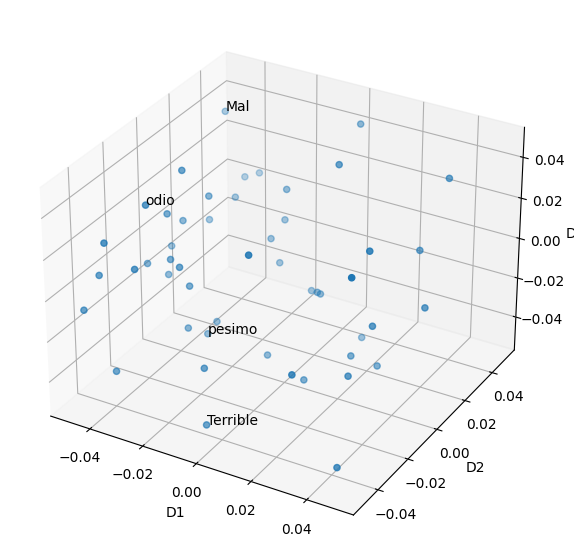

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

puntos3=np.array(embedding_layer3.get_weights())
x=puntos3[0,:,0]
y=puntos3[0,:,1]
z=puntos3[0,:,2]

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(x, y, z)
ax.set_xlabel('D1')
ax.set_ylabel('D2')
ax.set_zlabel('D3')
ax.text3D(x[48],y[48],z[48],'Mal')
ax.text3D(x[30],y[30],z[30],'Terrible')
ax.text3D(x[38],y[38],z[38],'pesimo')
ax.text3D(x[39],y[39],z[39],'odio')

Ajuste del modelo

In [ ]:
model3.fit(padded_reviews,labels,epochs=100,verbose=1)

Evaluación del modelo

In [14]:
loss, accuracy = model3.evaluate(padded_reviews, labels, verbose=1)

1/1 [==============================] - 0s 159ms/step - loss: 0.5493 - acc: 1.0000


Creación de una entrada para probar el modelo

In [19]:
entrada=['dentener']
entrada_cod=[one_hot(d,Vocab_size) for d in entrada]
padded_entrada = pad_sequences(entrada_cod,maxlen=max_length,padding='post')
padded_entrada

array([[22, 12,  0,  0]], dtype=int32)

Aplicación de la entrada al modelo

In [20]:
model3.predict(padded_entrada)

1/1 [==============================] - 0s 31ms/step


array([[0.37566382]], dtype=float32)

In [23]:
if(model3.predict(padded_entrada)>0.5):
  print("Moverse")
else:
  print("Detenerse")

1/1 [==============================] - 0s 20ms/step
Atras


##Creación de modelo de red neuronal con una capa de embedding de 8 dimensiones

In [ ]:
model8 = Sequential()
embedding_layer8 = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length)
model8.add(embedding_layer8)
model8.add(Flatten())
model8.add(Dense(1,activation='sigmoid'))
model8.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])
print(model8.summary())

In [ ]:
model8.fit(padded_reviews,labels,epochs=100,verbose=0)
loss, accuracy = model8.evaluate(padded_reviews, labels, verbose=1)

1/1 [==============================] - 0s 27ms/step - loss: 0.2730 - acc: 1.0000


In [ ]:
entrada=['mal']
entrada_cod=[one_hot(d,Vocab_size) for d in entrada]
padded_entrada = pad_sequences(entrada_cod,maxlen=max_length,padding='post')
padded_entrada

array([[8, 0, 0, 0]], dtype=int32)

In [ ]:
salida=model8.predict(padded_entrada)
print(salida)
if(model8.predict(padded_entrada)>0.5):
  print("Ok")
else:
  print("No Ok")

1/1 [==============================] - 1s 1s/step
[[0.32830384]]
1/1 [==============================] - 0s 32ms/step
No Ok


#Ejemplo codificación One-hot

In [ ]:
from keras.preprocessing.text import one_hot

# define the document
docs = ['Glass', 'Banana', 'Apple', 'Orange', 'Mango', 'Peach']

# estimate the size of the vocabulary
vocab_size = len(set(docs)) + 1

# integer encode the document
result = one_hot(' '.join(docs), round(vocab_size*1.3))

print(result)

[3, 5, 8, 8, 7, 8]
